# Trending topics of a subreddit
The idea of the project is very simple:
- Create an application that generates a trending topic for a subreddit
chosen
- The program must receive as input:
  - A subreddit, for example: https://www.reddit.com/r/skincancer/
  - A start and end date
  - A number N of words to perform the ranking
- Your program must return as output:
  - The N most commented words of the period (from largest to smallest) 
saved in JSON format
  - An image with a word cloud for the most frequent words in the period (does not need to be the N most frequent)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gabriel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data saved to 'most_commented_words.json'


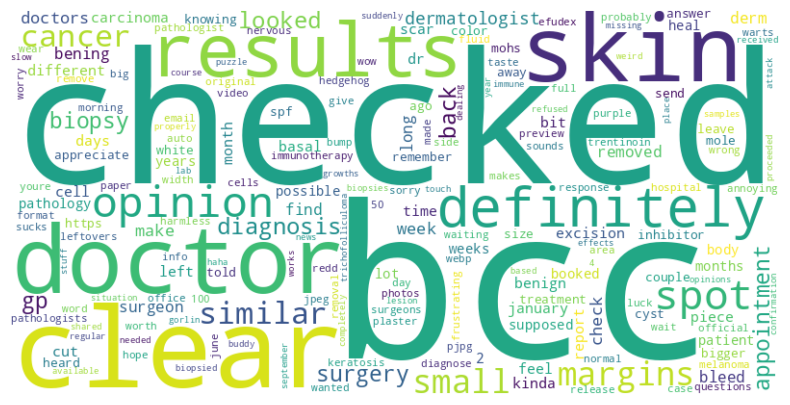

In [1]:
# pip install praw
# sudo apt install python3-nltk
# pip install WordCloud
import praw
import datetime
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words())

# how to get the credentials: https://www.geeksforgeeks.org/how-to-get-client_id-and-client_secret-for-python-reddit-api-registration/
# reddit = praw.Reddit(client_id ='my client id',  
#                      client_secret ='my client secret',  
#                      user_agent ='my user agent',  
#                      username ='my username',  
#                      password ='my password')  

def get_all_words_and_frequencies(subreddit_name, start_date, end_date):
    subreddit = reddit.subreddit(subreddit_name)
    
    # Iterate through the search results and create a list with all the comments
    comments = []
    for submission in subreddit.search(query='*', sort='comments', limit=None):
        if start_date <= submission.created_utc <= end_date:
            submission.comments.replace_more(limit=0)
            for comment in submission.comments.list():
                comments.append(comment.body)
    
    all_words = []
    for comment in comments:
        # Use regex to split by non-word characters and filter out empty strings
        words = re.findall(r'\b\w+\b', comment.lower())  # Convert to lowercase
        # Remove stop words
        words = [word for word in words if word not in stop_words]
        all_words.extend(words)
    
    # Count the frequency of each word
    word_counts = Counter(all_words)
    return word_counts


def save_json_file(word_counts, N):
    # Get the N most common words
    most_commented_words = word_counts.most_common(N)
    
    # Convert the result to JSON format
    result = [{"word": word, "count": count} for word, count in most_commented_words]
    
    # Save the JSON to a file
    with open('most_commented_words.json', 'w') as f:
        json.dump(result, f)
    print("Data saved to 'most_commented_words.json'")


def create_word_cloud(word_counts):
    # Get the M most common words
    M = 200
    most_commented_words = dict(word_counts.most_common(M))
    
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_commented_words)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


def generate_trending_topics(subreddit_name, start_date, end_date, N):
    word_counts = get_all_words_and_frequencies(subreddit_name,start_date,end_date)
    save_json_file(word_counts, N)
    create_word_cloud(word_counts)


# Define the inputs
subreddit_name = 'skincancer'
start_date = datetime.datetime(2024, 5, 1).timestamp()
end_date = datetime.datetime(2024, 5, 18).timestamp()
N = 10
generate_trending_topics(subreddit_name, start_date, end_date, N)